In [1]:
import fastai

In [2]:
from fastai.vision import *

In [3]:


#path = '/opt/AIStorage/PLAYGROUND/images/1024/'

path = '/opt/AIStorage/PLAYGROUND/images/512/filtered/data_filtered/'


data = ImageDataBunch.from_folder(path, size=512, valid_pct=0.2,bs=16, ds_tfms=(rand_pad(2, 512), []))


epochs=12

#arch = models.densenet121

#arch = models.densenet169

arch = models.densenet201

    
    

In [4]:
learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True).to_fp16()
#learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True)
#learn = cnn_learner(data, arch, metrics=accuracy, opt_func=optim.SGD)

In [5]:
#learn.lr_find()
#learn.recorder.plot()

In [6]:
learn.model = nn.DataParallel(learn.model)
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,accuracy,time
0,0.519099,0.461788,0.770538,06:52
1,0.442938,0.370349,0.831728,02:53
2,0.326993,0.255094,0.901983,02:55
3,0.281132,0.232227,0.910482,02:56
4,0.259262,0.212467,0.926912,02:56
5,0.212243,0.203459,0.925212,02:56
6,0.166629,0.174281,0.937110,02:56
7,0.146058,0.173856,0.935977,02:57
8,0.117787,0.174989,0.933144,02:56
9,0.111018,0.174310,0.933711,02:56


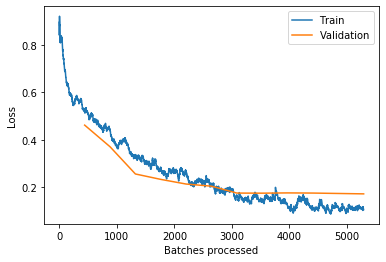

In [7]:
learn.recorder.plot_losses()

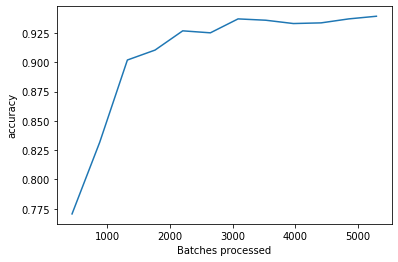

In [8]:
learn.recorder.plot_metrics()

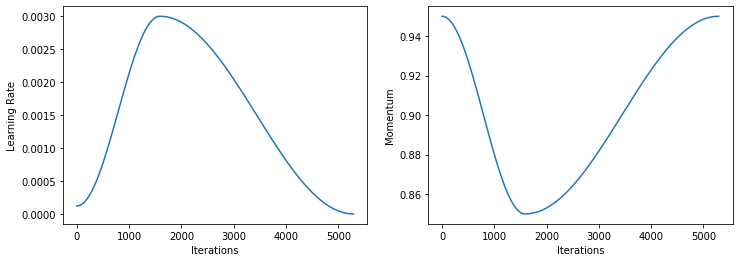

In [9]:
learn.recorder.plot_lr(show_moms=True)

In [10]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (7062 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
positive,positive,positive,positive,positive
Path: /opt/AIStorage/PLAYGROUND/images/512/filtered/data_filtered;

Valid: LabelList (1765 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
positive,positive,negative,positive,positive
Path: /opt/AIStorage/PLAYGROUND/images/512/filtered/data_filtered;

Test: None, model=DataParallel(
  (module): Sequential(
    (0): Sequential(
      (0): Sequential(
        (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu0): ReLU(inplace=True)
        (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
       

In [11]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

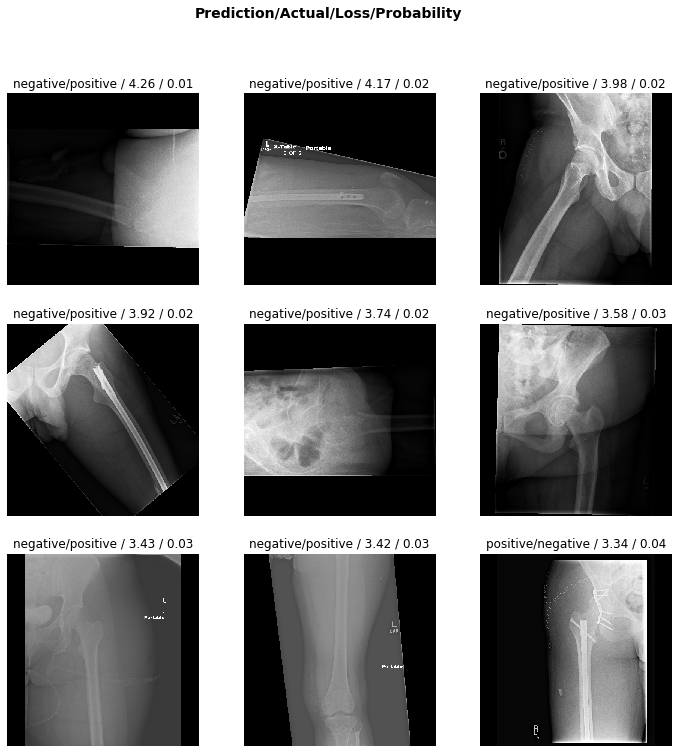

In [12]:
interp.plot_top_losses(k=9)